In [1]:
import random
import tensorflow as tf
import numpy as np
import os
from scipy import ndimage
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors

%matplotlib inline

In [17]:
men=np.load('/home/ubuntu/Data/menPixel.npy')
women=np.load('/home/ubuntu/Data/womenPixel.npy')
pixel = np.concatenate((men,women),axis=3)

In [2]:
graph = tf.Graph()
with graph.as_default():
    importer = tf.train.import_meta_graph('alex_vars.meta')

sess = tf.Session(graph=graph)
importer.restore(sess, 'alex_vars')

In [3]:
# Get outputs from second-to-last layer in pre-built model
fc7_op = graph.get_operation_by_name('fc7/relu')
fc7 = fc7_op.outputs[0]
x = graph.get_operation_by_name('input').outputs[0]
init = graph.get_operation_by_name('init')

sess = tf.Session(graph=graph)
sess.run(init)

In [56]:
extracted_features=np.load('AlexNet_Color.npy')
nbrs = NearestNeighbors(n_neighbors=10, algorithm='ball_tree').fit(extracted_features)

In [57]:
Names=['0_m.jpg', '1_m.jpg', '2_m.jpg', '3_m.jpg', '4_m.jpg', '5_m.jpg',
       '6_m.jpg', '7_m.jpg', '8_m.jpg', '9_m.jpg']
from PIL import Image
fname = '/home/ubuntu/'+Names[9]
img = Image.open(fname)


In [58]:
Image=np.zeros((120,120,3,1))
Image[:,:,:,0]=img
feature_image = sess.run(fc7, feed_dict={x: [Image[:,:,:,0]]})


In [59]:
distances, indices = nbrs.kneighbors(feature_image)
indices

array([[16413, 25114,  4781,  9500,  9497, 19506, 32616, 20489, 27071,
        31402]])

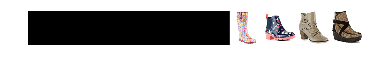

In [60]:
combined=[np.concatenate([pixel[:,:,:,i] for i in indices[0]],axis=1)]
plt.imshow(combined[0].astype('uint8'))
plt.axis('off')
plt.show()